In [23]:
import pandas as pd
import opendatasets as od
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [24]:
od.download("https://www.kaggle.com/chirin/africa-economic-banking-and-systemic-crisis-data?select=african_crises.csv")


Skipping, found downloaded files in "./africa-economic-banking-and-systemic-crisis-data" (use force=True to force download)


In [7]:
data = pd.read_csv("/Users/susanolapade/Documents/GitHub/Africa-Econ-Crisis-Analysis-NYU/africa-economic-banking-and-systemic-crisis-data/african_crises.csv")
data.head

<bound method NDFrame.head of       case  cc3   country  year  systemic_crisis    exch_usd  \
0        1  DZA   Algeria  1870                1    0.052264   
1        1  DZA   Algeria  1871                0    0.052798   
2        1  DZA   Algeria  1872                0    0.052274   
3        1  DZA   Algeria  1873                0    0.051680   
4        1  DZA   Algeria  1874                0    0.051308   
...    ...  ...       ...   ...              ...         ...   
1054    70  ZWE  Zimbabwe  2009                1  354.800000   
1055    70  ZWE  Zimbabwe  2010                0  378.200000   
1056    70  ZWE  Zimbabwe  2011                0  361.900000   
1057    70  ZWE  Zimbabwe  2012                0  361.900000   
1058    70  ZWE  Zimbabwe  2013                0  361.900000   

      domestic_debt_in_default  sovereign_external_debt_default  \
0                            0                                0   
1                            0                                0   


In [8]:
print(data.dtypes)

case                                 int64
cc3                                 object
country                             object
year                                 int64
systemic_crisis                      int64
exch_usd                           float64
domestic_debt_in_default             int64
sovereign_external_debt_default      int64
gdp_weighted_default               float64
inflation_annual_cpi               float64
independence                         int64
currency_crises                      int64
inflation_crises                     int64
banking_crisis                      object
dtype: object


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case                             1059 non-null   int64  
 1   cc3                              1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

In [13]:
data.describe()

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1.059000e+03,1059.000000,1059.000000,1059.000000
mean,35.613787,1967.767705,0.077432,43.140831,0.039660,0.152975,0.006402,2.084889e+04,0.776204,0.132200,0.129367
std,23.692402,33.530632,0.267401,111.475380,0.195251,0.360133,0.043572,6.757274e+05,0.416984,0.349847,0.335765
min,1.000000,1860.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.850214e+01,0.000000,0.000000,0.000000
25%,15.000000,1951.000000,0.000000,0.195350,0.000000,0.000000,0.000000,2.086162e+00,1.000000,0.000000,0.000000
50%,38.000000,1973.000000,0.000000,0.868400,0.000000,0.000000,0.000000,5.762330e+00,1.000000,0.000000,0.000000
75%,56.000000,1994.000000,0.000000,8.462750,0.000000,0.000000,0.000000,1.164405e+01,1.000000,0.000000,0.000000
max,70.000000,2014.000000,1.000000,744.306139,1.000000,1.000000,0.400000,2.198970e+07,1.000000,2.000000,1.000000


In [19]:
data['country'].value_counts()

Egypt                       155
South Africa                114
Zimbabwe                     90
Algeria                      85
Angola                       77
Morocco                      75
Tunisia                      75
Zambia                       72
Mauritius                    68
Kenya                        67
Ivory Coast                  63
Nigeria                      60
Central African Republic     58
Name: country, dtype: int64

In [91]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')



In [21]:
country = data.country.unique()
country

array(['Algeria', 'Angola', 'Central African Republic', 'Ivory Coast',
       'Egypt', 'Kenya', 'Mauritius', 'Morocco', 'Nigeria',
       'South Africa', 'Tunisia', 'Zambia', 'Zimbabwe'], dtype=object)

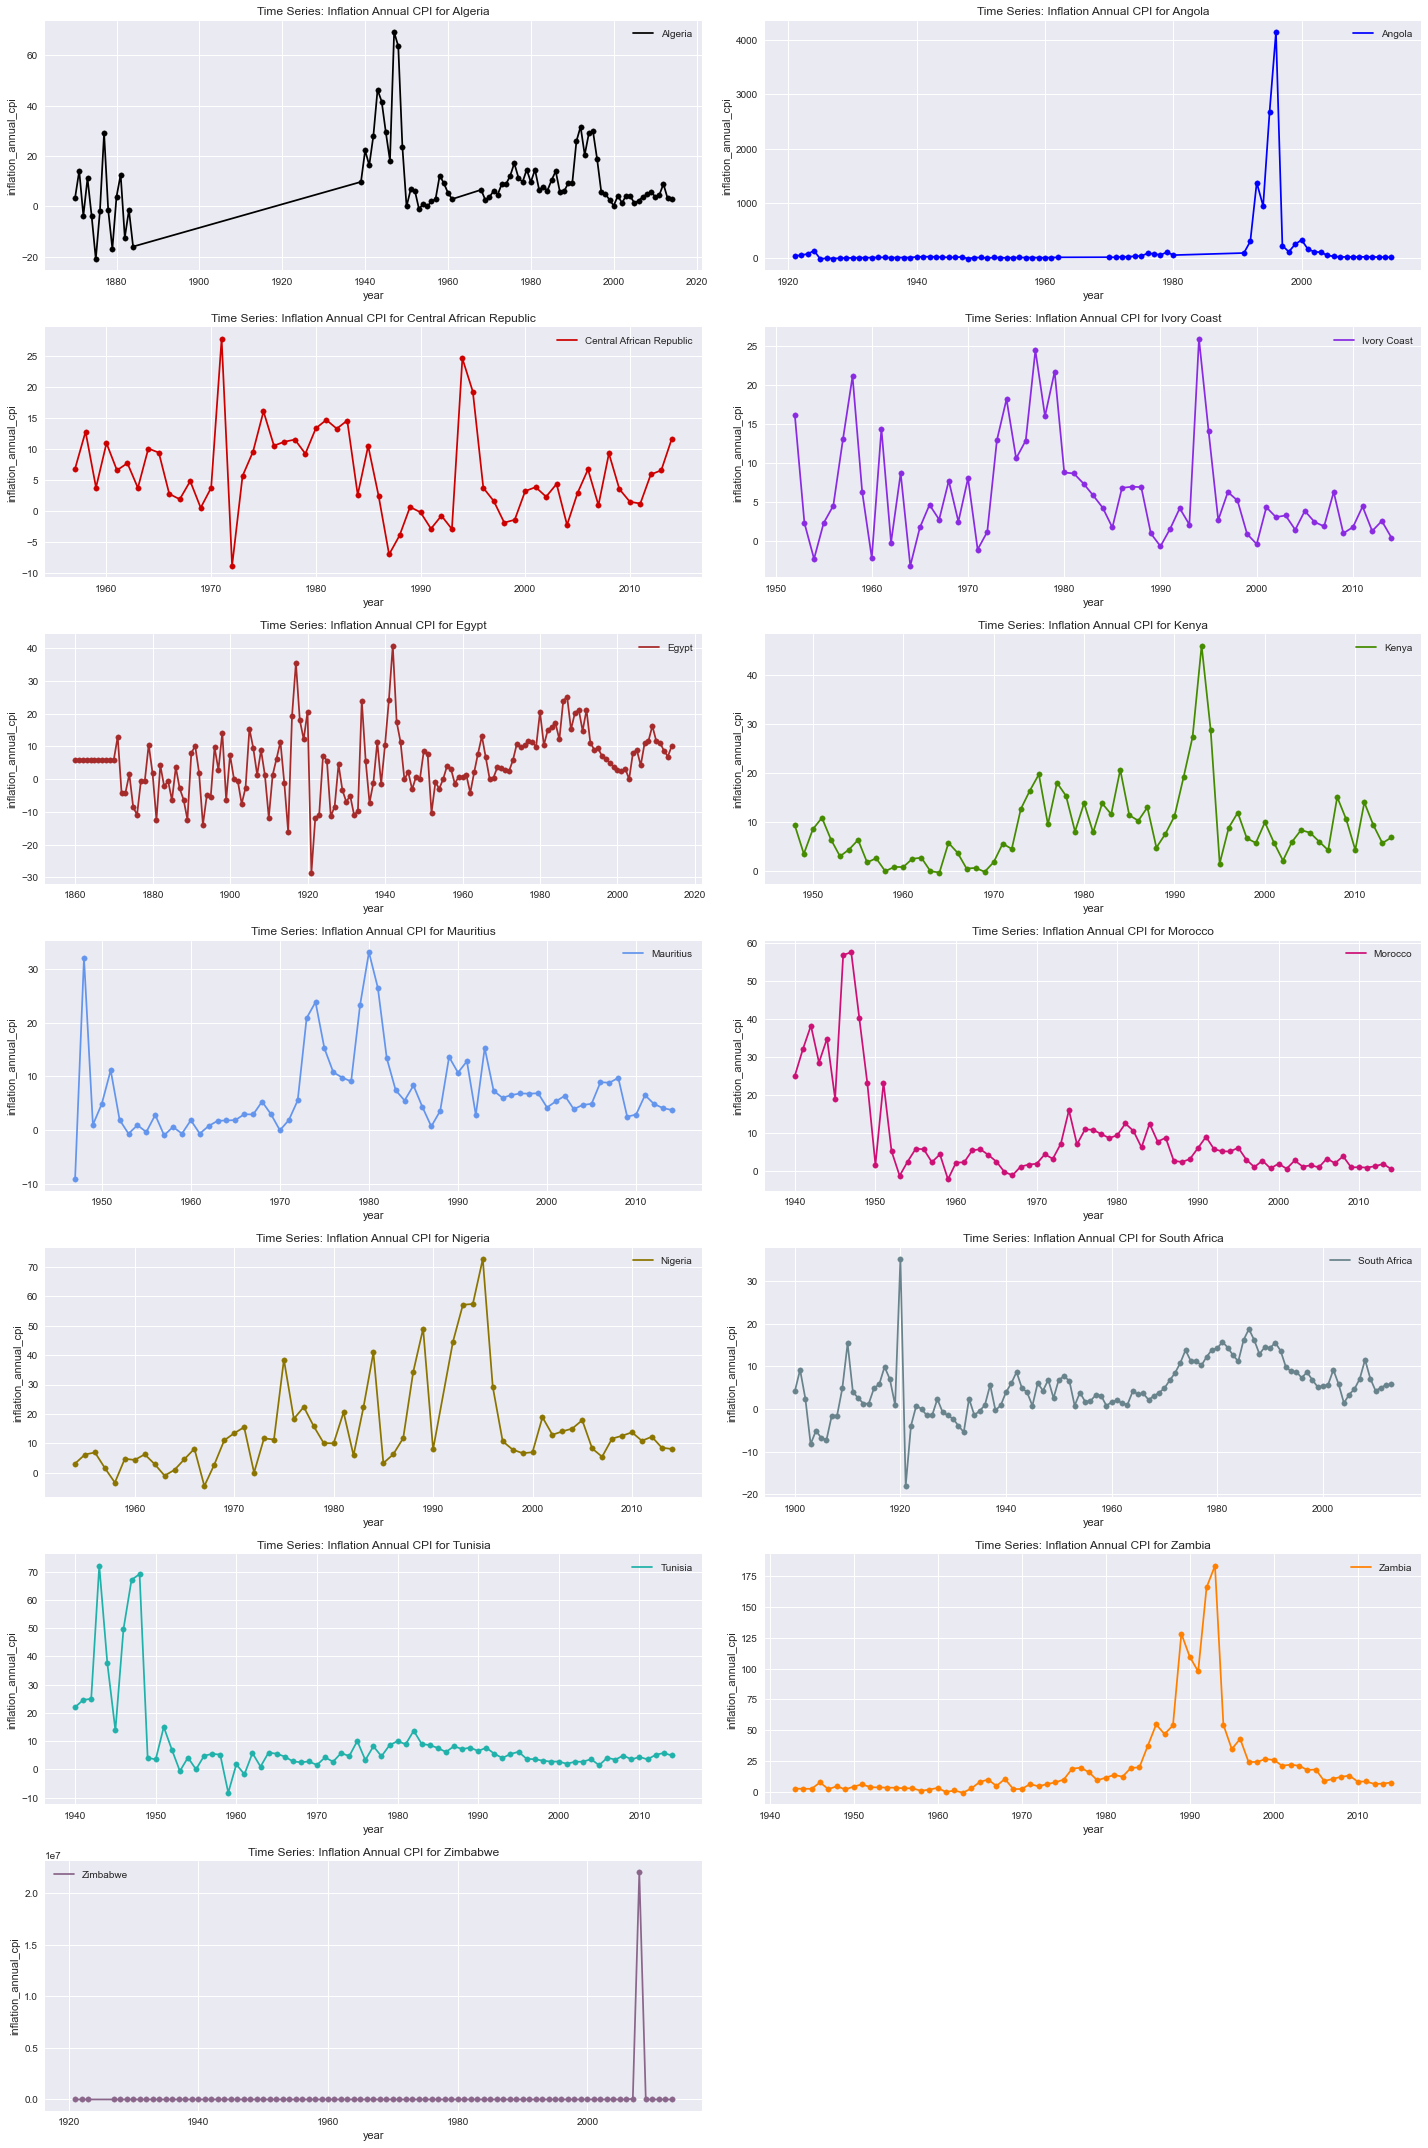

In [97]:
#Time series plot for annual inflation cpi
plt.style.use('seaborn')
plt.figure(figsize=(20,30))
count = 0
#color ="#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
colors = ['#000000','#0000FF','#CD0000','#8A2BE2','#A52A2A',
               '#458B00','#6495ED','#CD1076','#8B7500','#68838B','#20B2AA',
               '#FF8000','#8B668B']

for c in country:
    plt.subplot(7,2,1+count) 
    col = colors[count]
    count +=1
    
    sns.lineplot(x=data[data.country == c]['year'], 
                 y=data[data.country == c]['inflation_annual_cpi'],
                    color = col, label=c)
    plt.scatter(x=data[data.country == c]['year'],
                y=data[data.country == c]['inflation_annual_cpi'],
                    color = col, s=30)  
    plt.title("Time Series: Inflation Annual CPI for "+ c) 
    plt.legend()
plt.tight_layout()



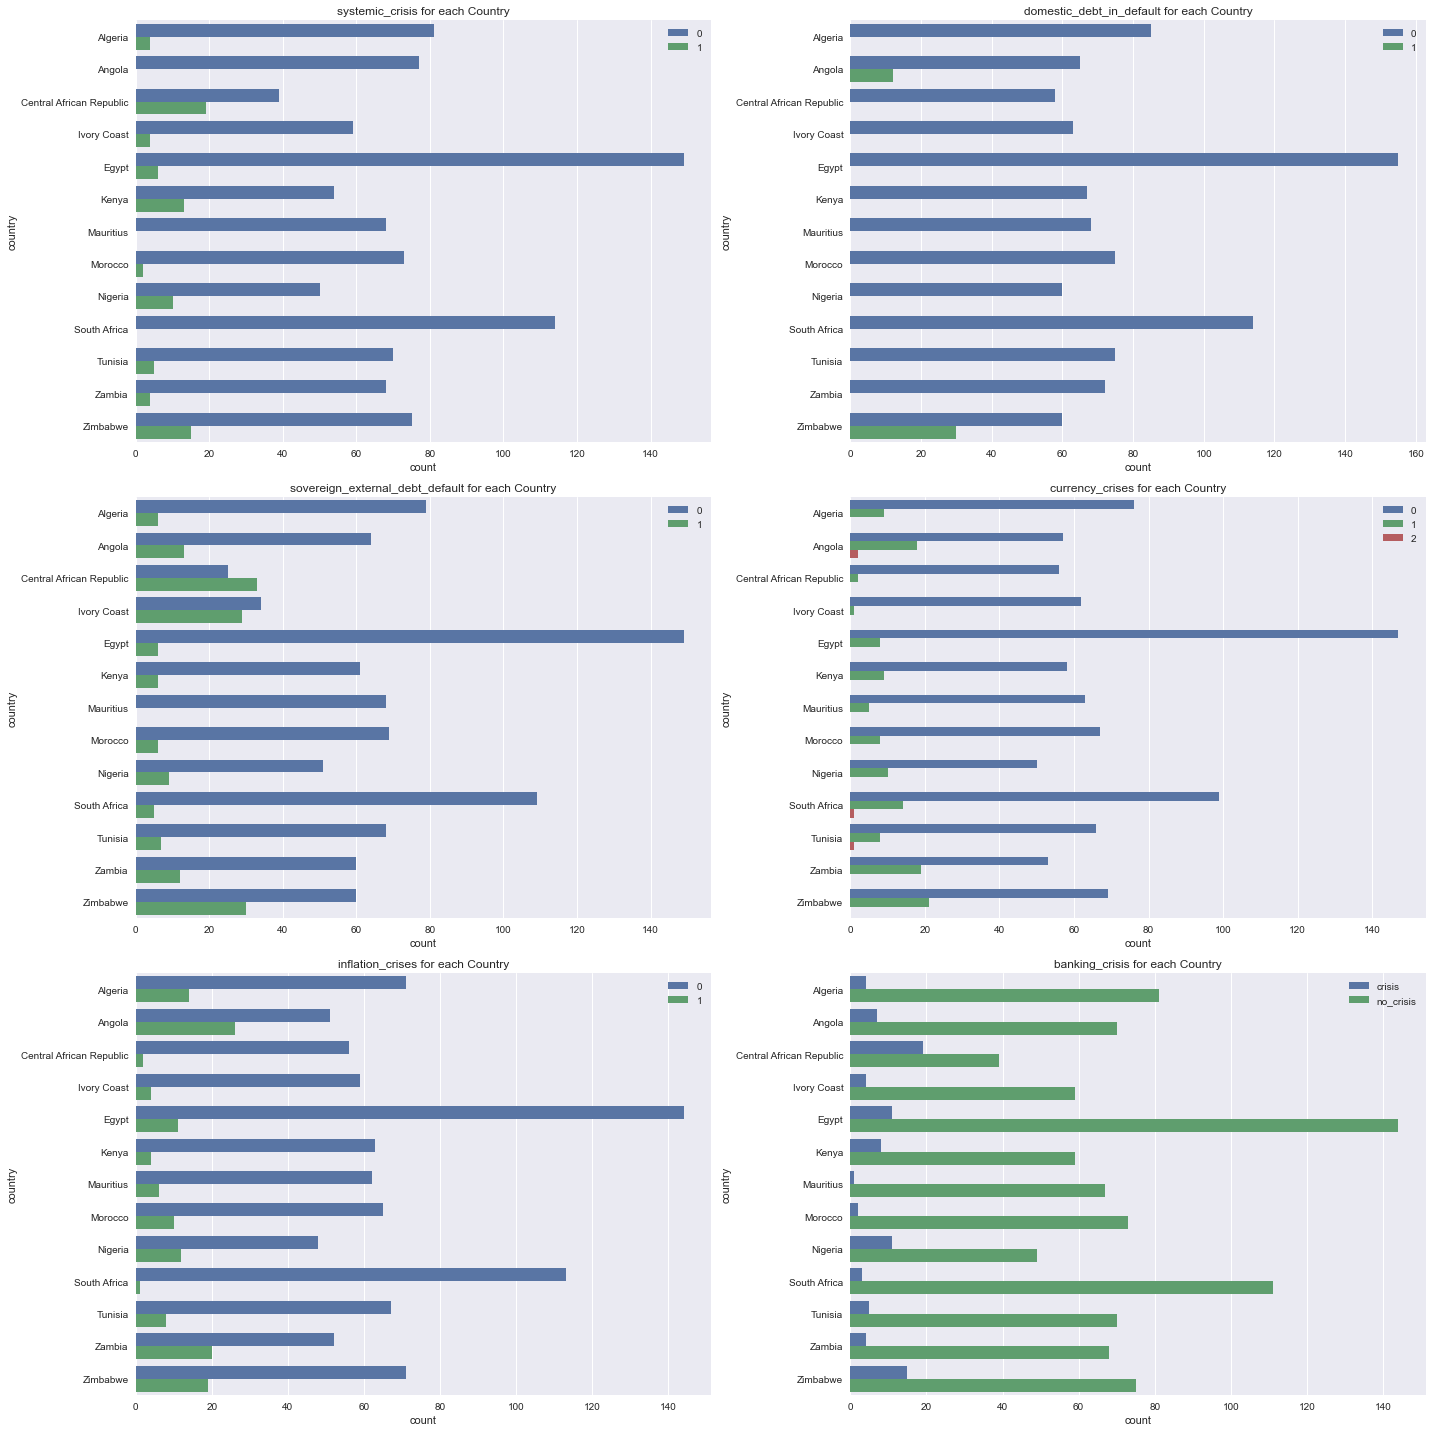

In [79]:
#Visualization of different crises for each country
chart=['systemic_crisis','domestic_debt_in_default',
      'sovereign_external_debt_default','currency_crises',
      'inflation_crises','banking_crisis']
plt.figure(figsize=(20,20))
count = 0
for value in chart:
      plt.subplot(3,2, count+1)
      count +=1
      sns.countplot(y=data.country, hue=data[value])
      plt.legend(loc=0)
      plt.title(value +' for each Country')
      plt.tight_layout()

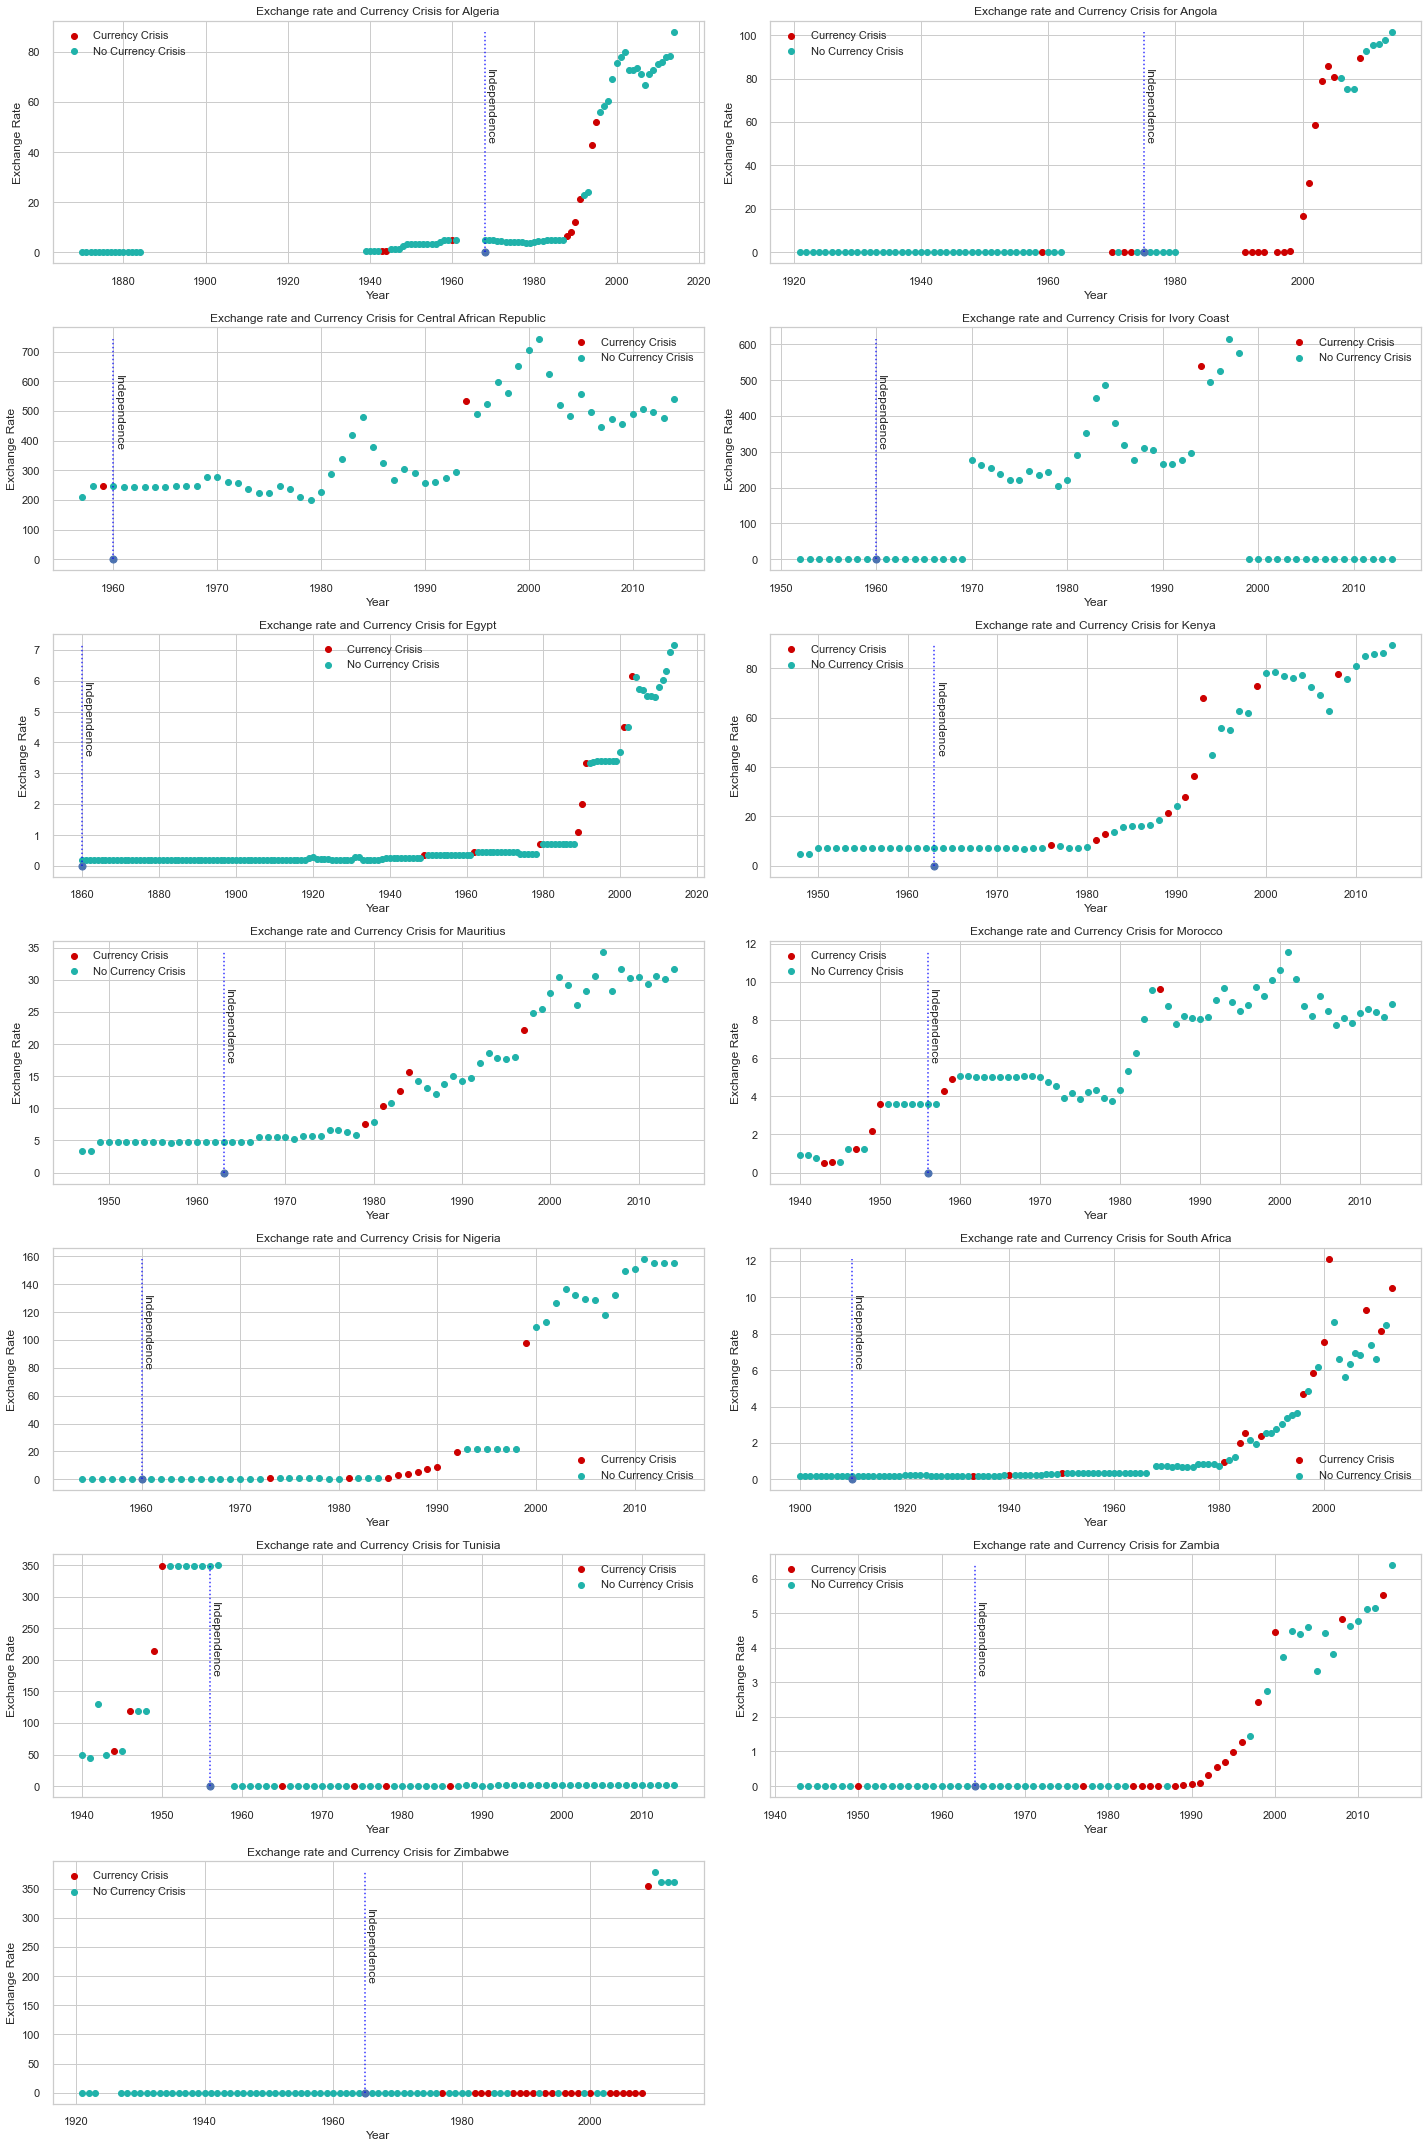

In [105]:
#Exchange rate and curreny crisis for each country showing independence year
sns.set(style='whitegrid')
plt.figure(figsize=(20,30))
count = 0
for c in country:
    plt.subplot(7, 2, count+1)
    count +=1
    plt.scatter(x=data.year[(data.country == c) & (data.currency_crises == 1)],
                y=data.exch_usd[(data.country == c) & (data.currency_crises == 1)], 
                c='#CD0000', label='Currency Crisis')
    plt.scatter(x=data.year[(data.country == c) & (data.currency_crises == 0)],
                y=data.exch_usd[(data.country == c) & (data.currency_crises == 0)], 
                c='#20B2AA', label='No Currency Crisis')
    # plt.scatter(x=data.year[(data.country == c) & (data.currency_crises == 2)],
    #             y=data.exch_usd[(data.country == c) & (data.currency_crises == 2)], 
    #             c='#8B7500', label='No Currency Crisis')
    plt.plot([np.min(data[np.logical_and(data.country==c,data.independence==1)]['year']),
              np.min(data[np.logical_and(data.country==c,data.independence==1)]['year'])],
             [0, np.max(data[data.country==c]['exch_usd'])],
             color='blue',
             linestyle='dotted',
             alpha=0.8)
    
    plt.text(np.min(data[np.logical_and(data.country==c,data.independence==1)]['year']),
             np.max(data[data.country==c]['exch_usd'])/2,
             'Independence',
             rotation=-90)
    plt.scatter(x=np.min(data[np.logical_and(data.country==c,data.independence==1)]['year']),
                y=0,
                s=50)
    
    plt.xticks()
    #plt.grid()
    plt.xlabel('Year')
    plt.ylabel('Exchange Rate')
    plt.title('Exchange rate and Currency Crisis for '+ c)
    plt.legend()
plt.tight_layout()